In [121]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [122]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


# Wersja z materiałów:

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

predictions_lr = model_lr.predict(X_test_standardized)
print('Accuracy: ', accuracy_score(y_test, predictions_lr).round(2))
print("Precision:", precision_score(y_test, predictions_lr).round(2))
print("Recall:", recall_score(y_test, predictions_lr).round(2))
print("F1_score dla testowych:", f1_score(y_test, predictions_lr).round(2))


# predictions_train = model_lr.predict(X_train_standardized)
# print("F1_score dla treningowych:", f1_score(y_train, predictions_train).round(2))

Accuracy:  0.75
Precision: 0.64
Recall: 0.53
F1_score dla testowych: 0.58


C:\Users\kulin\AppData\Local\Temp\ipykernel_624\2928339012.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


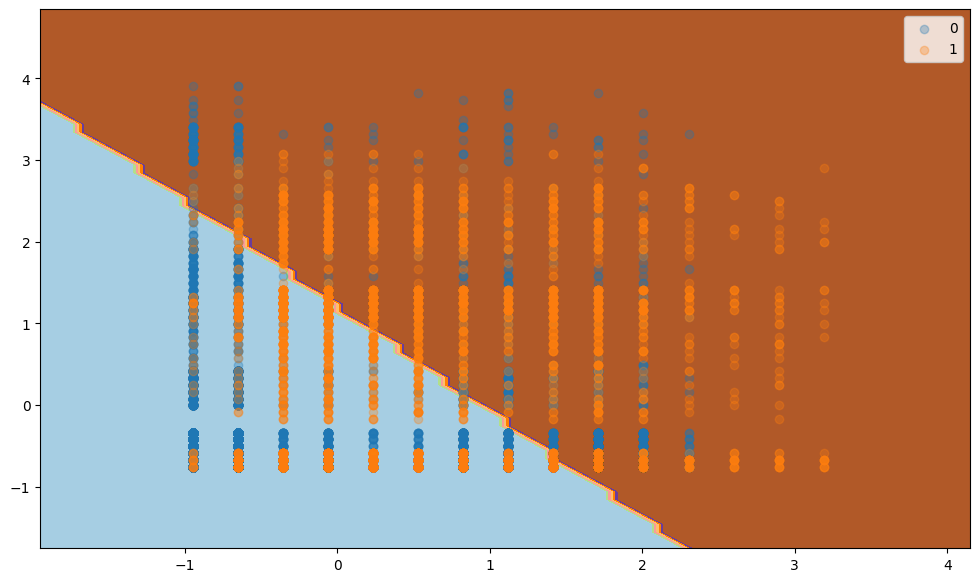

In [125]:
import matplotlib.pyplot as plt
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

# Zadanie:
Poznaliśmy już pierwszy model dla regresji logistycznej, teraz sprawdź jak zachowuje się model dla różnych regularyzacji i ich stopnia. Zwizualizuj działanie modelu z wykorzystaniem funkcji plot_classification_surface oraz za każdym razem oblicz F1_score na zbiorze treningowym oraz testowym (zobaczysz czy model przypadkiem się nie przeucza).

1) Logistic Regression dla penalty = 'l1', solver = 'liblinear'
2) Logistic Regression dla penalty = 'l1', solver = 'liblinear', C = 0.1
3) Logistic Regression dla penalty = 'l1', solver = 'saga'
4) Logistic Regression dla penalty = 'l1', solver = 'saga', C = 0.1

5) Logistic Regression dla penalty = 'l2', solver = 'liblinear'
6) Logistic Regression dla penalty = 'l2', solver = 'liblinear', C = 0.1
7) Logistic Regression dla penalty = 'l2', solver = 'newton-cg'
8) Logistic Regression dla penalty = 'l2', solver = 'newton-cg', C = 0.1
9) Logistic Regression dla penalty = 'l2', solver = 'sag'
10) Logistic Regression dla penalty = 'l2', solver = 'sag', C = 0.1
11) Logistic Regression dla penalty = 'l2', solver = 'saga'
12) Logistic Regression dla penalty = 'l2', solver = 'saga', C = 0.1

13) Logistic Regression dla penalty = '‘elasticnet’', solver = 'saga'
14) Logistic Regression dla penalty = '‘elasticnet’', solver = 'saga', C = 0.1

Aby wybrać/zmienić "penalty" trzeba dostosowywać "solver". Dokonałam tego na podstawie dokumentacji. Stopień dla każdego modelu ustawiłam 1.0 oraz, początkowo, 0.5 . W przypadku C = 0.5 nic sie nie zmieniło. Gdy zmieniłam C na 0.1 wartości "Accuracy" zmieniła sie z 0.75 na 0.74. Gdy ustawiłam C = 0.01 "Recall", "F1_score dla testowych", "F1_score dla treningowych" z 0.53 zmieniły się na 0.51. Czyli pogorszyły się, ale nieznacznie.

In [126]:
l1_liblinear_1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')
l1_liblinear_1.fit(X_train_standardized, y_train)
l1_liblinear_C = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.01)
l1_liblinear_C.fit(X_train_standardized, y_train)

l1_saga_1 = LogisticRegression(penalty = 'l1', solver = 'saga')
l1_saga_1.fit(X_train_standardized, y_train)
l1_saga_C = LogisticRegression(penalty = 'l1', solver = 'saga', C = 0.01)
l1_saga_C.fit(X_train_standardized, y_train)

l2_liblinear_1 = LogisticRegression(penalty = 'l2', solver = 'liblinear')
l2_liblinear_1.fit(X_train_standardized, y_train)
l2_liblinear_C = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.01)
l2_liblinear_C.fit(X_train_standardized, y_train)

l2_newton_cg_1 = LogisticRegression(penalty = 'l2', solver = 'newton-cg')
l2_newton_cg_1.fit(X_train_standardized, y_train)
l2_newton_cg_C = LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = 0.01)
l2_newton_cg_C.fit(X_train_standardized, y_train)

l2_sag_1 = LogisticRegression(penalty = 'l2', solver = 'sag')
l2_sag_1.fit(X_train_standardized, y_train)
l2_sag_C = LogisticRegression(penalty = 'l2', solver = 'sag', C = 0.01)
l2_sag_C.fit(X_train_standardized, y_train)

l2_saga_1 = LogisticRegression(penalty = 'l2', solver = 'saga')
l2_saga_1.fit(X_train_standardized, y_train)
l2_saga_C = LogisticRegression(penalty = 'l2', solver = 'saga', C = 0.01)
l2_saga_C.fit(X_train_standardized, y_train)

elasticnet_saga_1 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio=0.3)
elasticnet_saga_1.fit(X_train_standardized, y_train)
elasticnet_saga_C = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio=0.7)
elasticnet_saga_C.fit(X_train_standardized, y_train)


LogisticRegression(l1_ratio=0.7, penalty='elasticnet', solver='saga')

In [127]:
modele = [l1_liblinear_1,
l1_liblinear_C,
l1_saga_1,
l1_saga_C,
l2_liblinear_1,
l2_liblinear_C,
l2_newton_cg_1,
l2_newton_cg_C,
l2_sag_1,
l2_sag_C,
l2_saga_1,
l2_saga_C,
elasticnet_saga_1,
elasticnet_saga_C
]

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

labels = [
'l1_liblinear_1',
'l1_liblinear_C',
'l1_saga_1',
'l1_saga_C',
'l2_liblinear_1',
'l2_liblinear_C',
'l2_newton_cg_1',
'l2_newton_cg_C',
'l2_sag_1',
'l2_sag_C',
'l2_saga_1',
'l2_saga_C',
'elasticnet_saga_1',
'elasticnet_saga_C'    
]
accuracy = []
precision = []
recall = []
F1_score_dla_testowych = []
F1_score_dla_treningowych = []

for model in modele:
    predictions_lr = model.predict(X_test_standardized)
    predictions_train = model.predict(X_train_standardized)
    accuracy.append(accuracy_score(y_test, predictions_lr).round(2))
    precision.append(precision_score(y_test, predictions_lr).round(2))
    recall.append(recall_score(y_test, predictions_lr).round(2))
    F1_score_dla_testowych.append(f1_score(y_test, predictions_lr).round(2))
    F1_score_dla_treningowych.append(f1_score(y_train, predictions_train).round(2))

df = pd.DataFrame(index = labels)
df['Accuracy'] = accuracy
df['Precision'] = precision
df['Recall'] = recall
df['F1_score dla testowych'] = recall
df['F1_score dla treningowych'] = recall
df

,Accuracy,Precision,Recall,F1_score dla testowych,F1_score dla treningowych
l1_liblinear_1,0.75,0.64,0.53,0.53,0.53
l1_liblinear_C,0.74,0.64,0.53,0.53,0.53
l1_saga_1,0.75,0.64,0.53,0.53,0.53
l1_saga_C,0.74,0.64,0.51,0.51,0.51
l2_liblinear_1,0.75,0.64,0.53,0.53,0.53
l2_liblinear_C,0.75,0.64,0.53,0.53,0.53
l2_newton_cg_1,0.75,0.64,0.53,0.53,0.53
l2_newton_cg_C,0.74,0.64,0.51,0.51,0.51
l2_sag_1,0.75,0.64,0.53,0.53,0.53
l2_sag_C,0.74,0.64,0.51,0.51,0.51


In [129]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

Dla modelu z materiałów:

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



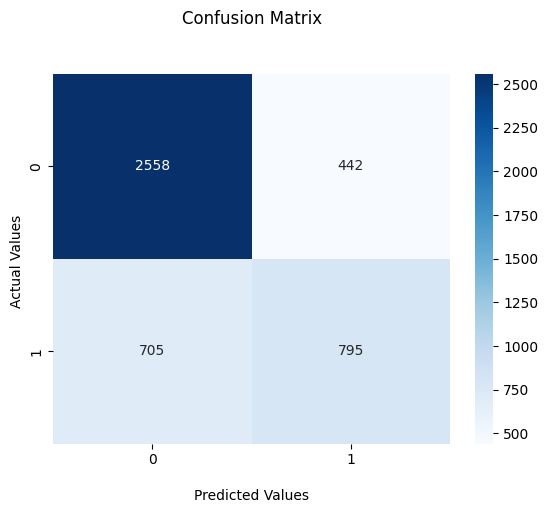

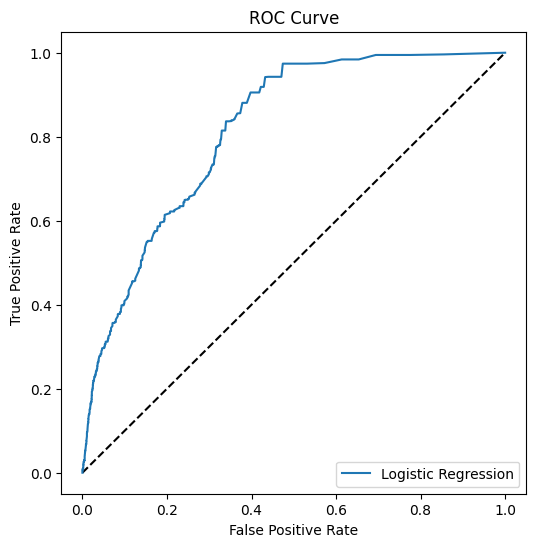

C:\Users\kulin\AppData\Local\Temp\ipykernel_624\489805271.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493


In [130]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

Dla moich modeli:

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



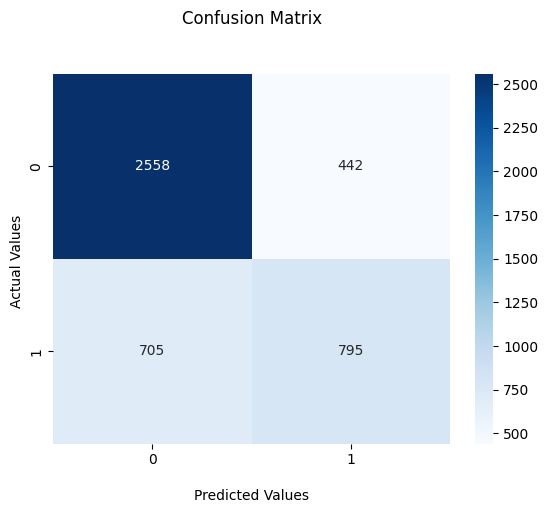

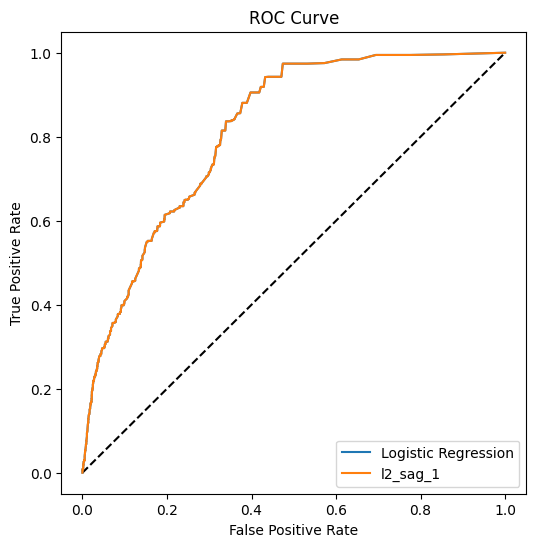

C:\Users\kulin\AppData\Local\Temp\ipykernel_624\489805271.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493
1,l2_sag_1,0.580928,0.816493


In [131]:
calculate_metrics(l2_sag_1, 'l2_sag_1', X_test_standardized, y_test)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      3000
           1       0.64      0.51      0.57      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.68      0.69      4500
weighted avg       0.73      0.74      0.73      4500



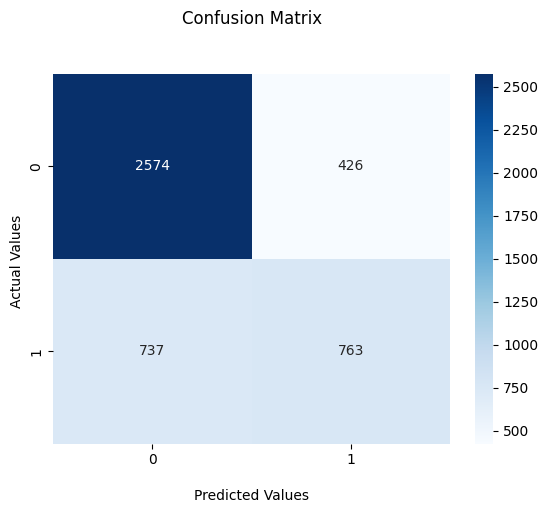

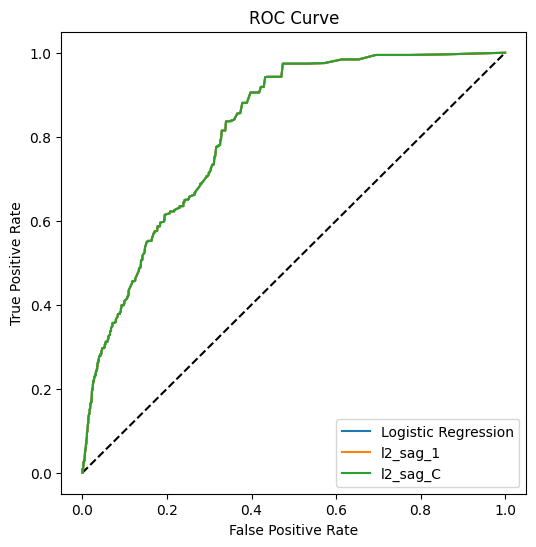

C:\Users\kulin\AppData\Local\Temp\ipykernel_624\489805271.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493
1,l2_sag_1,0.580928,0.816493
2,l2_sag_C,0.567497,0.816493


In [133]:
calculate_metrics(l2_sag_C, 'l2_sag_C', X_test_standardized, y_test)

C:\Users\kulin\AppData\Local\Temp\ipykernel_624\2928339012.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


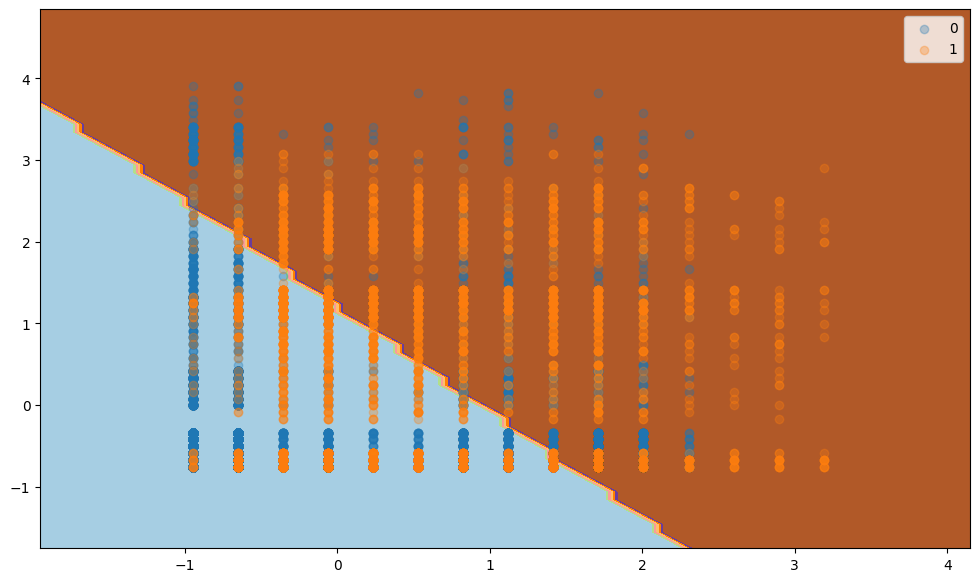

In [134]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

C:\Users\kulin\AppData\Local\Temp\ipykernel_624\2928339012.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


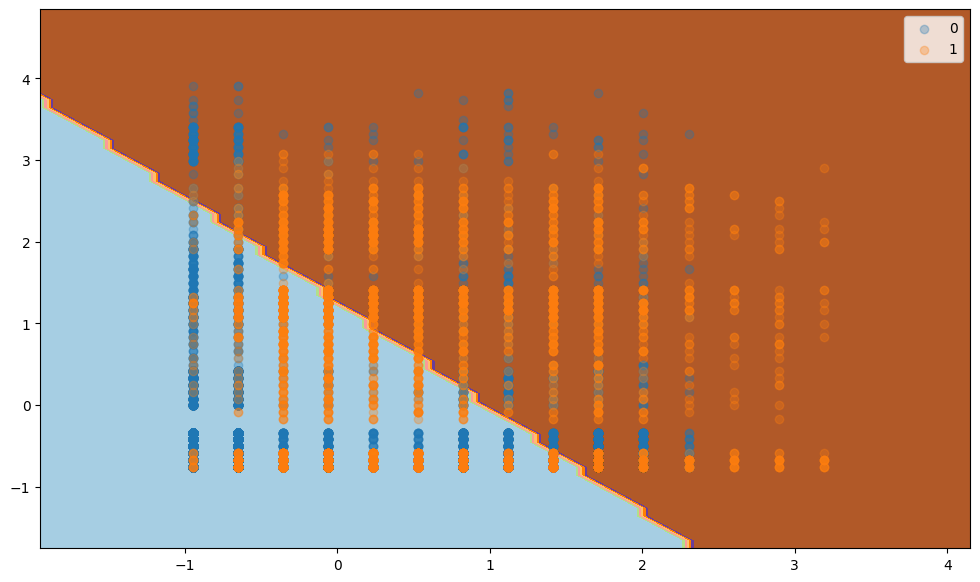

In [135]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=l2_sag_C)

# Wniosek: Obawiam się, że robię coś źle, bo są tak mało zanczące różnice.